<div style="text-align: center; background-color: #f8f8f8; padding: 2em;">
    <h3>Master of Science in quantitative and financial modeling</h3>
    <h4>'Travaux Pratiques'</h4>
    <span>
        EXAMINER: Prof. L. Laayouni&nbsp;&nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;&nbsp;
        Due date: Monday March 25 2024
    </span>
    <br>
    <br>
    FAMILY NAME: AKOTENOU<br>
    GIVEN NAMES: Généreux Mahouzonssou
</div>

<h3>Exercise 1</h3>

Find the $L U$-factorization of the following matrix $\mathbf{A}$ in $\mathbb{R}^{n \times n}$ :
$$
\mathbf{A}=\left[\begin{array}{ccccc}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & -1 & 2 & -1 \\
0 & \cdots & 0 & -1 & 2
\end{array}\right]
$$

- Is the matrix A positive definite, or is it positive semi-definite?

$A$ is a tridiagonal matrix.
$A=\operatorname{tridiag}(-1,2,-1)$. As A is symmetric we will use <b>Sylvester</b> theorem. We have to prove that all principal sub-matrix  of A have non-null and positive determinant.

$\operatorname{det} A_1=2 ; \operatorname{det} A_2=3 ; \operatorname{det} A_3=3+1$.
Let suppose that det$A_k=k+1$ for k>3 and then let's try to prove for k+1 that $\operatorname{det} A_k=k+1$ (we will use recurrence).

We have $\operatorname{det}(A_k)=2(\operatorname{det} A_{k-1})-\operatorname{det}(A_{k-2})$<br>
For $k+1$ we have:
$$
\begin{aligned}
\operatorname{det}(A_{k+1}) & =2 \operatorname{det}(A_{k-1})-\operatorname{det} (A_{k-2}) \\
& =2(k+1)-(k-1)+1 \\
& =2 k+2-k \\
\operatorname{det}(A_{k+1}) & =(k+1)+1
\end{aligned}
$$

So by recurrence for All $k$,  det$(A_k)=\bar{k}+1$ .
As $k>0$ then for all $A_k$; $\operatorname{det}(A_k)>0$ then <b>we conclude that A is positive definite</b>.



* Write a Python script to solve a linear system associated with the above matrix.

In [1]:
import numpy as np
import scipy
import scipy.linalg

# Define A
n=4
A = -1*np.eye(n, n, k=-1) + 2*np.eye(n, n, k=0) + -1*np.eye(n, n, k=1)
print("A: ")
print(A)

# LU-Factorization
P, L, U = scipy.linalg.lu(A)
print("L: ")
print(L)
print("U: ")
print(U)

A: 
[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
L: 
[[ 1.          0.          0.          0.        ]
 [-0.5         1.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.        ]
 [ 0.          0.         -0.75        1.        ]]
U: 
[[ 2.         -1.          0.          0.        ]
 [ 0.          1.5        -1.          0.        ]
 [ 0.          0.          1.33333333 -1.        ]
 [ 0.          0.          0.          1.25      ]]


In [2]:
# Let's solve a linear system associated with the above matrix
"""
Matrix A is tridiagonal. We have performed LU decomposition on A.
Objective: Solve (LUx = b) using forward and backward substitution:
    1- Solve Ly=b using forward substitution;
    2- Solve Ux=y using backward substitution.
"""

def forward_solve(A, b, d):
    n = len(b)
    x = np.zeros(n)
    x[0] = b[0] / A[0, 0]
    for k in range(1, n):
        lk = max(1, k-d)
        x[k] = (b[k] - np.dot(A[k, lk-1:k], x[lk-1:k])) / A[k, k]
    return x

def backward_solve(A, b, d):
    n = len(b)
    x = np.zeros(n)
    x[-1] = b[-1] / A[-1, -1]
    for k in range(n-2, -1, -1):
        uk = min(n, k+d+1)
        x[k] = (b[k] - np.dot(A[k, k+1:uk], x[k+1:uk])) / A[k, k]
    return x

b = np.ones(n)
y = forward_solve(L, b, 1)
x = backward_solve(U, y, 1)
print("Solution: ", x)

Solution:  [2. 3. 3. 2.]


<div style="background-color: #f8f8f8; padding: 1em;">
    <b>Note :</b><br>
Since our matrices are not dense, we have chosen to optimize the computation time, for which we have used the value of a d-banded matrix.
</div>

<h3>Exercise 2</h3>

Consider the following boundary value problem modeling the heat flow in a long pipe:

$$
\left\{\begin{array}{l}
y^{\prime \prime}(x)-p(x) y^{\prime}(x)-q(x) y(x)=r(x), \quad x \in[a, b] \\
y(a)=\alpha, y(b)=\beta
\end{array}\right.
$$

- Use a uniform discretization of the interval $[a, b]$ to derive the linear system corresponding to the model problem.

<div style="display: flex; flex-direction: column;">
    <img src="./image/math/1.jpg" style="width: 50%;">
    <img src="./image/math/2.jpg" style="width: 50%;">
</div>

SETUP: Modeling

In [3]:
import numpy as np

# Utils
def tridiag(a, b, c):
    return np.diag(a, k=1) + np.diag(b, k=0) + np.diag(c, k=-1)

def generate_Ab(N, a, b, alpha, beta, p, q, r):
    Dx = (b-a) / (N-1)
    x  = np.linspace(a, b, N)
    
    # Create colums then tridiag matrix
    vect_1  = np.ones(N-3)
    vect_pq = -q(x[1:N-1])*(Dx**2) - p(x[1:N-1])*Dx - 2
    vect_p  = 1 + p(x[2:N-1])*Dx
    A       = tridiag(vect_1, vect_pq, vect_p)
    A       = (Dx**-2)*A

    # Build matrix b
    b = r(x[1:N-1])
    b[0]  -= alpha*((1+p(x[1])*Dx)/Dx**2)
    b[-1] -= beta/(Dx**2)
    
    # return
    return A, b

In [4]:
# Problem Data
N     = 10
x_a   = 0
x_b   = 1
alpha = 0
beta  = 0

# Function
p = lambda x: 0*x
q = lambda x: 0*x
r = lambda x: -np.exp(x) + x - 1

# Build Matrix A and b
A, b = generate_Ab(N, x_a, x_b, alpha, beta, p, q, r)

# Display
print("A: \n", A)
print("b: \n", b)

A: 
 [[-162.   81.    0.    0.    0.    0.    0.    0.]
 [  81. -162.   81.    0.    0.    0.    0.    0.]
 [   0.   81. -162.   81.    0.    0.    0.    0.]
 [   0.    0.   81. -162.   81.    0.    0.    0.]
 [   0.    0.    0.   81. -162.   81.    0.    0.]
 [   0.    0.    0.    0.   81. -162.   81.    0.]
 [   0.    0.    0.    0.    0.   81. -162.   81.]
 [   0.    0.    0.    0.    0.    0.   81. -162.]]
b: 
 [-2.00640796 -2.02662665 -2.06227909 -2.11517905 -2.18735344 -2.28106737
 -2.39885215 -2.54353657]


- (b) Solve the linear system using the Gaussian elimination method.

In [5]:
import numpy as np
import time

def Gauss_solver(A: list = [], b: list = [], timing=False):
    """
    Solves a linear system of equations using Gauss elimination with pivot.

    Steps:
    1 - We transform the system into an upper triangular matrix
    2 - Solve Ax=b with backward substitution

    Returns:
    x (numpy.ndarray): Solution vector.
    """
    A = np.copy(A)
    b = np.copy(b)
    n = len(b)
    x = np.zeros(n)

    start_time = time.time()
    for k in range(0, n-1):
        # Let's find maximum pivot in column k
        row_with_max_pivot = k
        for i in range(k + 1, n):
            if abs(A[i, k]) > abs(A[row_with_max_pivot, k]):
                row_with_max_pivot = i
        
        A[[k, row_with_max_pivot]] = A[[row_with_max_pivot, k]]
        b[k], b[row_with_max_pivot] = b[row_with_max_pivot], b[k]

        if A[k][k] == 0:
            return np.zeros(n)

        # Let's transform the system into an upper triangular matrix.
        for i in range(k + 1, n):
            pivot = A[i, k] / A[k, k]
            for j in range(k, n):
                A[i, j] -= pivot * A[k, j]
            b[i] -= pivot * b[k]
            
    # Solving, let compute x
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x if not timing else (x, (time.time()-start_time)*1)

In [6]:
y = Gauss_solver(A, b)
print("Solution using gauss elimination is:", y)

Solution using gauss elimination is: [0.10441849 0.1840665  0.23869444 0.26786214 0.27091652 0.24696653
 0.19485522 0.11312846]


- (c) Solve the linear system using QR-factorization.

In [7]:
import numpy as np
import time

def QR_solver(A, b, timing=False):
    """
    Solves a linear system of equations using QR decomposition

    Steps:
    1 - QR factorisation
    2 - We have (QR)x = b; We solve Qy = b with y = Q.T*b (as Q is orthogonal matrix)
    3 - We solve Rx=y with backward substitution (as R is upper triangular)

    Returns:
    x (numpy.ndarray): Solution vector.
    """
    
    start_time = time.time()
    # Do QR decomposition
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
        
    # Find y values where Qy=b
    y = np.dot(Q.T, b)
    
    # Find x where Rx=y (Note: R is 2-banded)
    x = np.zeros(m)
    d = 2
    x[-1] = y[-1] / R[-1, -1]
    for k in range(n-2, -1, -1):
        uk = min(n, k+d+1)
        x[k] = (y[k] - np.dot(R[k, k+1:uk], x[k+1:uk])) / R[k, k]
    
    return x if not timing else (x, (time.time()-start_time)*1)

In [8]:
y = QR_solver(A, b)
print("Solution using QR-factorization is:", y)

Solution using QR-factorization is: [0.10441849 0.1840665  0.23869444 0.26786214 0.27091652 0.24696653
 0.19485522 0.11312846]


- (d) Solve the linear system using SVD-decomposition.

In [9]:
import numpy as np
import time

def SVD_solver(A, b, timing=False):
    """
    Solves a linear system of equations using SVD decomposition

    Steps:
    1 - SVD decomposition
    2 - We have (USV_t)x = b; We solve with forward substitution Sy = b where y = V_t*x (as U is orthogonal matrix)
    3 - We solve V_t*x=y => x = V_t.T*y

    Returns:
    x (numpy.ndarray): Solution vector.
    """
    
    start_time = time.time()
    # Do SVD decomposition
    U, S, V_t = np.linalg.svd(A)
    S = np.diag(S)
    
    # Let find y with forward substitution applied to 1-banded matrix
    n = len(b)
    d = 1
    Ub = np.dot(U.T, b)
    y = np.zeros(n)
    y[0] = Ub[0] / S[0, 0]
    for k in range(1, n):
        lk = max(1, k-d)
        y[k] = (Ub[k] - np.dot(S[k, lk-1:k], y[lk-1:k])) / S[k, k]
                
    # Let find x
    x = np.dot(V_t.T, y)

    return x if not timing else (x, (time.time()-start_time)*1)

In [10]:
y = SVD_solver(A, b)
print("Solution using SVD-decomposition is:", y)

Solution using SVD-decomposition is: [0.10441849 0.1840665  0.23869444 0.26786214 0.27091652 0.24696653
 0.19485522 0.11312846]


- (e) Compare the three methods.

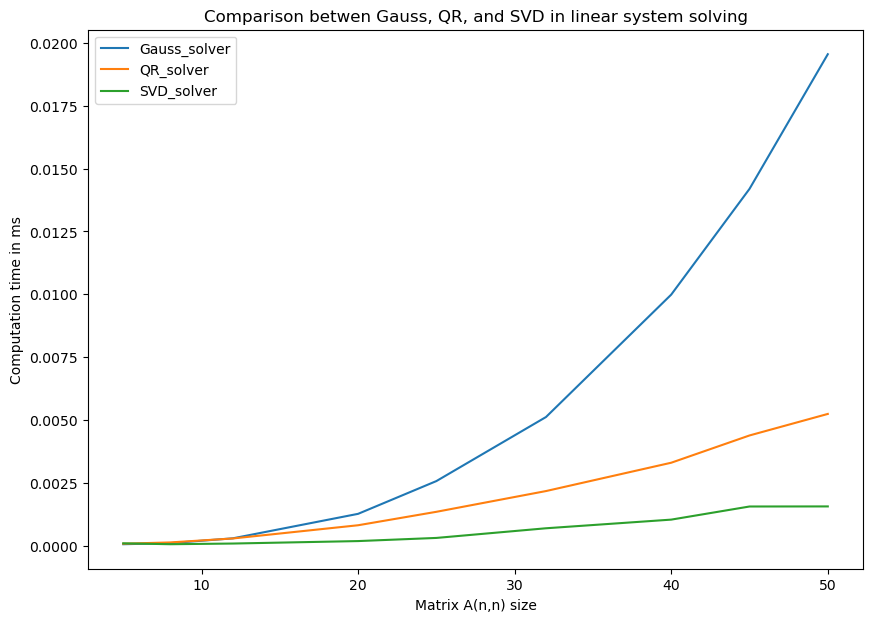

In [11]:
import matplotlib.pyplot as plt

N_SIZE     = [5, 8, 12, 20, 25, 32, 40, 45, 50]
TIME_GAUSS = []
TIME_QR    = []
TIME_SVD   = []

# Problem Data
x_a   = 0
x_b   = 1
alpha = 0
beta  = 0
p = lambda x: 0*x
q = lambda x: 0*x
r = lambda x: 10*np.ceil(x*10)

# Record algo timing
for N in N_SIZE:
    A, b = generate_Ab(N, x_a, x_b, alpha, beta, p, q, r)
    
    t = Gauss_solver(A, b, timing=True)[1]
    TIME_GAUSS.append(t)
    
    t = QR_solver(A, b, timing=True)[1]
    TIME_QR.append(t)
    
    t = SVD_solver(A, b, timing=True)[1]
    TIME_SVD.append(t)
    
# Plot time performance
plt.figure(figsize=(10, 7))
plt.plot(N_SIZE, TIME_GAUSS, label="Gauss_solver")
plt.plot(N_SIZE, TIME_QR, label="QR_solver")
plt.plot(N_SIZE, TIME_SVD, label="SVD_solver")
plt.legend()
plt.xlabel("Matrix A(n,n) size")
plt.ylabel("Computation time in ms")
plt.title("Comparison betwen Gauss, QR, and SVD in linear system solving")
plt.show()

<div style="background-color: #f8f8f8; padding: 1em;">
    <b>Description :</b><br>
    We observe that for matrix sizes smaller than 9, the method of solving the system $Ax=b$ based on QR decomposition takes more time than the SVD decomposition. However, the Gaussian method is the most efficient with the least computational time. Beyond size 10, as the matrix size grows exponentially, we notice that the Gaussian method becomes the most time-consuming. Following that, the QR decomposition method comes next, and finally, the method based on SVD decomposition is the most efficient with the least amount of time required to solve the problem.
</div>

<h3>Exercise 3</h3>

Solve the problem of fitting a polynomial $p(x)=\sum_{i=0}^d c_i x^{i}$ of degree $d$ to data points $\left(x_i, y i\right), i=1, \ldots, m$, in the plane by the method of normal equations and $Q R$ decomposition. Choose the degree of the polynomial to be $d=5$ and then $d=15$, choose the interval $x \in[-1,1]$, discretize it using $N=10$ or $N=20$ points.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialFitting:
    """
    This class could be used to fit any polynomial.

    Steps:
    1 - It takes the degree, the number of points N, and then the polynomial we want to fit.
    2 - First, we generate the matrix A, then we make QR decomposition, then we compute the coefficients c that
        fit the polynomial best.
    3 - By the end, we plot both the real and approximated polynomial.

    Returns:
    Draws a matplotlib image instance.
    """
    def __init__(self, d, N, polynom):
        self.d = d
        self.N = N
        self.x = np.linspace(-1, 1, self.N)
        self.b = polynom(self.x)
        self.c = np.zeros(d)

    def gram_schmidt(self, A):
        m, n = A.shape
        Q = np.zeros((m, n))
        R = np.zeros((n, n))
        for j in range(n):
            v = A[:, j]
            for i in range(j):
                R[i, j] = np.dot(Q[:, i].T, A[:, j])
                v = v - R[i, j] * Q[:, i]
            R[j, j] = np.linalg.norm(v)
            Q[:, j] = v / R[j, j]
        return Q, R

    def fit(self, ax):
        # Generate A
        A = []
        for i in range(self.d+1):
            col = self.x**(i)
            A.append(col)
        A = np.array(A).T

        # Compute polynomial coef with normal equation
        Q, R = self.gram_schmidt(A)
        #Q, R = np.linalg.qr(A, mode="reduced")
        R_1 = np.linalg.inv(R)
        self.c = np.dot(np.dot(R_1, Q.T), self.b)

        # plot
        ax.plot(self.x, self.b, marker=".", label='Exact function')
        ax.plot(self.x, np.dot(A, self.c), marker=".", label='Computed')
        ax.set_xlabel('x')
        ax.set_title(f'Case: d={self.d}, N={self.N}')
        ax.legend()

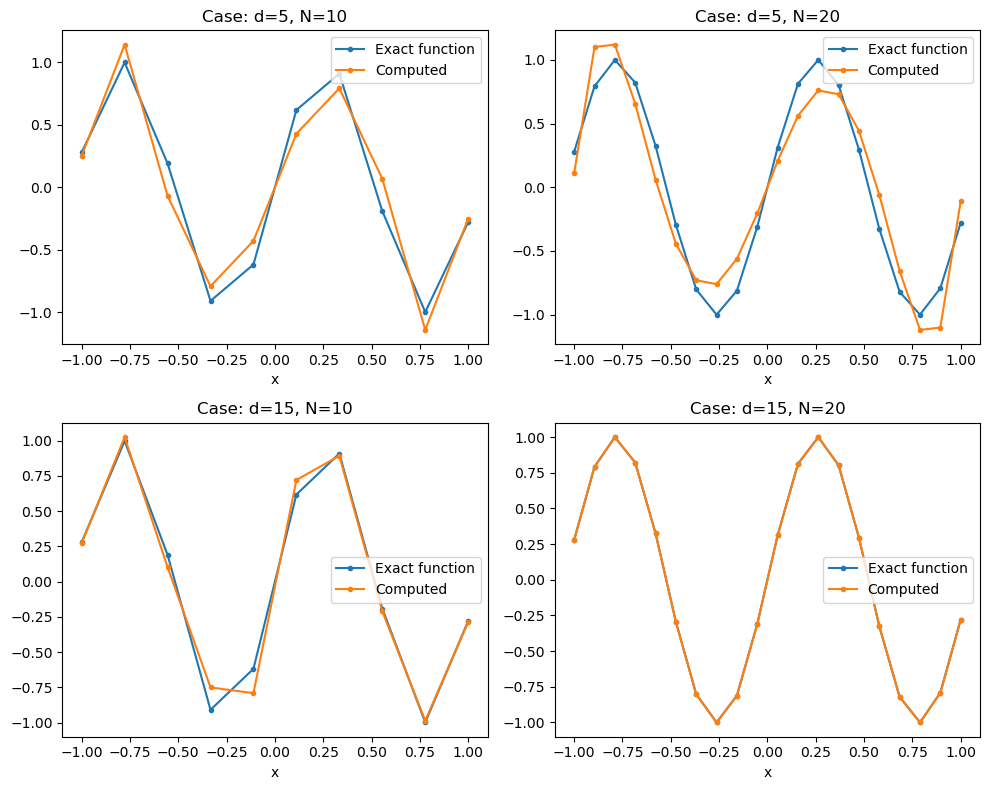

In [13]:
# right hand side function we wanna fit
b = lambda x: np.sin(6 * x)

model1 = PolynomialFitting(d=5,  N=10, polynom=b)
model2 = PolynomialFitting(d=5,  N=20, polynom=b)
model3 = PolynomialFitting(d=15, N=10, polynom=b)
model4 = PolynomialFitting(d=15, N=20, polynom=b)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

model1.fit(axs[0, 0])
model2.fit(axs[0, 1])
model3.fit(axs[1, 0])
model4.fit(axs[1, 1])

plt.tight_layout()
plt.show()

<div style="background-color: #f8f8f8; padding: 1em;">
    <b>Description :</b><br>
    We observe that the greater the degree is and the greater the number of discretization points is, the more precise the approximation is compared to the original class we want to fit. And this makes sense.<br>
    Therefore, we have an issue in the implementation. In fact, when we use the numpy.qr function, the case where the degree is greater than the number of points N does not work.
</div>

<h3>Exercise 4</h3>

- (a) Explain how Singular Value Decomposition (SVD) can be applied to compress color images. Discuss the process in the context of an RGB image.

<div style="background-color: #f8f8f8; padding: 1em;">
    Singular Value Decomposition (SVD) can be applied to compress color images by reducing the dimensionality of the image while preserving its essential information. In the context of an RGB image, SVD is applied separately to each color channel as separated matrix. So the first step it to separate color chanel into 3 matix. Then we decompose each matrix into three separate matrices: $U$, $\Sigma$, and $V^T$. The next step is to compress information. The singular values in the $\Sigma$ matrix represent the importance of each singular vector in reconstructing the original image. <b>By keeping only the top-$k$ singular values and truncating the rest, we reduce the dimensionality of the image.</b>
    <br><br>
    $
    \text{For each color: ci={r, g, b} let a m by n matrix A be defined as follow } A_{ci}=U_R\Sigma_RV_R^T where
    \begin{cases}
      U_R \text{ is a } m \times k \text{ matrix, } \\
      \Sigma_R \text{ is a } k \times k \text{ matrix,    }\\
      V_R^T \text{ is a } k \times n \text{ matrix }\\
    \end{cases}
    \text{ with } k = \min\{m,n\}
    $
    <br><br>
    Each matrix $A_r, A_g, A_b$ is transformed by taking new lower value for $k$. Finally, the compressed matrices for each color channel are combined back together to reconstruct the compressed color image. Since we have reduced the number of singular values, the reconstructed image will have less detail compared to the original image.
<div>

- (b) Given a color image, implement an SVD-based compression algorithm in Python.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def svd_compressor(image_path, rank=50):
    # Get image and extract chanel array
    image = Image.open(image_path)
    image_rgb = image.convert("RGB")
    image_array = np.array(image_rgb)
    r_chanel = image_array[:, :, 0]
    g_chanel = image_array[:, :, 1]
    b_chanel = image_array[:, :, 2]

    # Check rank interval
    k = min(image_array.shape[0], image_array.shape[1])
    assert 0<=rank<=k, "Wrong rank rate"

    # Perform singular Value Decomposition
    U_r, S_r, V_r = np.linalg.svd(r_chanel)
    U_g, S_g, V_g = np.linalg.svd(g_chanel)
    U_b, S_b, V_b = np.linalg.svd(b_chanel)

    # Reconstrcut the image with rank approximation
    approximation_r = np.dot(U_r[:, :rank], np.dot(np.diag(S_r[:rank]), V_r[:rank, :]))
    approximation_g = np.dot(U_g[:, :rank], np.dot(np.diag(S_g[:rank]), V_g[:rank, :]))
    approximation_b = np.dot(U_b[:, :rank], np.dot(np.diag(S_b[:rank]), V_b[:rank, :]))

    # Combine the chanel together
    approximation = np.stack((approximation_r.astype('uint8') , approximation_g.astype('uint8'), approximation_b.astype('uint8')), axis=-1)
    compressed_img = Image.fromarray(approximation, mode='RGB')

    # Display original and reduced image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_array)
    plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(approximation)
    plt.title('Approximation')
    plt.axis('off')
    plt.show()
    
    # Let's evaluate compression ratio: Here to evalue compression ration we try 
    # to retrieve image bytes size in memory for both original and approximate image
    original_byte_array = io.BytesIO()
    approxim_byte_array = io.BytesIO()
    image_rgb.save(original_byte_array, format='PNG')
    compressed_img.save(approxim_byte_array, format='PNG')
    original_img_size = original_byte_array.getbuffer().nbytes
    approxim_img_size = approxim_byte_array.getbuffer().nbytes
    compresion_ratio = round(approxim_img_size/original_img_size, 4)
    print(f"Rank: {rank}")
    print(f"Compression ratio: {compresion_ratio}")
    
    return compresion_ratio

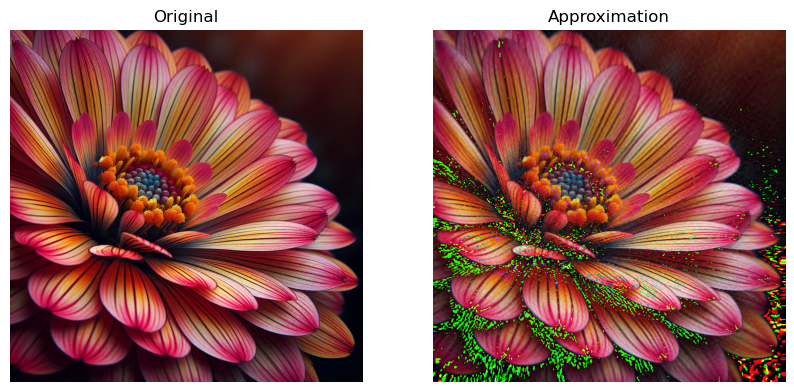

Rank: 90
Compression ratio: 0.9972


In [15]:
# TEST
image_path="./image/flower.png"
cr = svd_compressor(image_path, rank=90)

<div style="background-color: #f8f8f8; padding: 1em;">
<b>Note:</b><br>
    Since we define our ratio as <b>compressed_image_size</b> over <b>original_image_size</b>, the closer ratio to 1 indicates low reduction in terms of image size (there is not too much difference in terms of size), while the lower one indicates the best reduction of the original size with a loss of quality probably (we'll discuss this in the next session).
</div>

- (c) Analyze the effect of varying the number of singular values (k) on the compression ratio and image quality. Use a specific color image for this analysis and provide visual and numerical results for at least three different values of k. Discuss the trade-off between compression ratio and image quality.

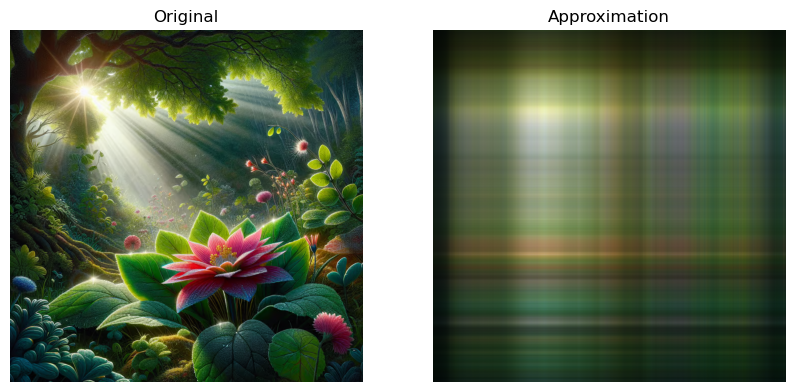

Rank: 1
Compression ratio: 0.325


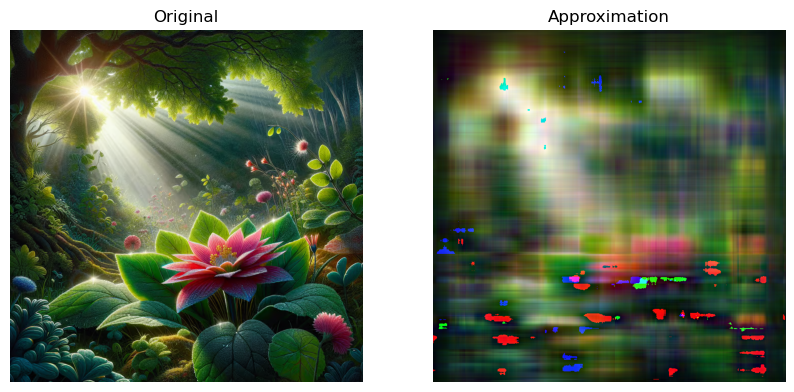

Rank: 5
Compression ratio: 0.4731


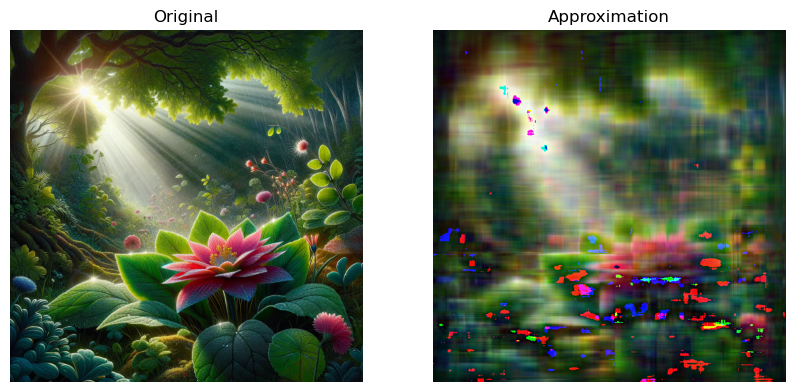

Rank: 10
Compression ratio: 0.548


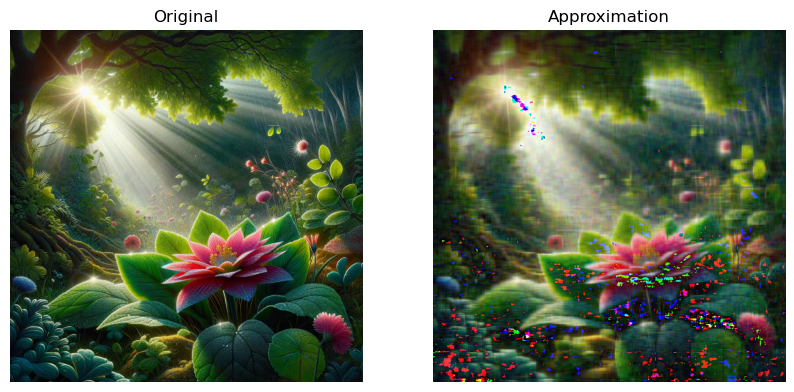

Rank: 30
Compression ratio: 0.6724


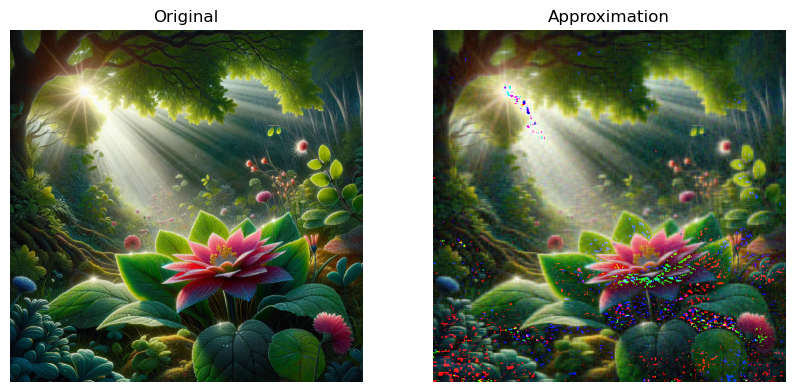

Rank: 50
Compression ratio: 0.7434


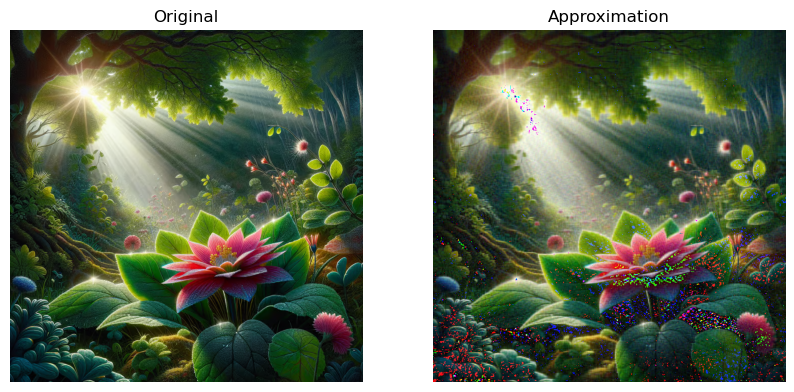

Rank: 80
Compression ratio: 0.8228


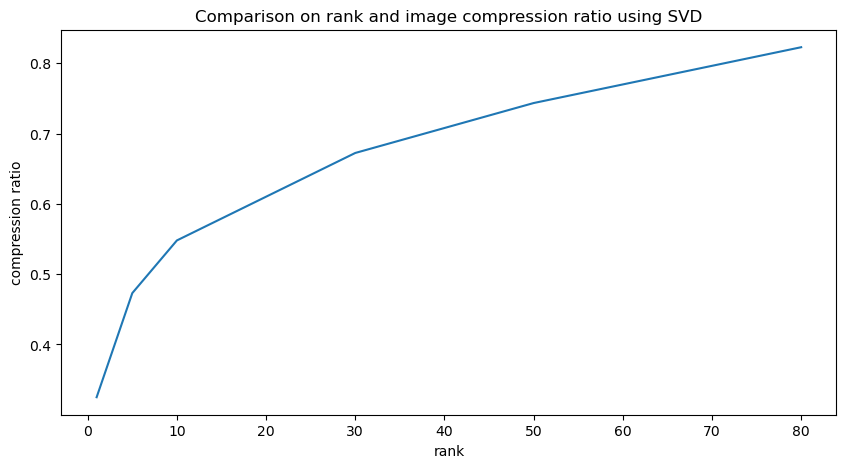

In [16]:
rank_list  = [1, 5, 10, 30, 50, 80]
ratio_list = []
image_path="./image/forest.png"

for rank in rank_list:
    ratio = svd_compressor(image_path, rank=rank)
    ratio_list.append(ratio)
    
plt.figure(figsize=(10, 5))
plt.plot(rank_list, ratio_list)
plt.xlabel('rank')
plt.ylabel('compression ratio')
plt.title('Comparison on rank and image compression ratio using SVD')
plt.show()

<div style="background-color: #f8f8f8; padding: 1em;">
<b>Description:</b><br>
We notice that as the rank increases, the compression ratio increases (values of the compression ratio close to 1 indicate poor compression in terms of image size). At the same time, the lower the rank, the more degraded the image is in terms of visual quality. 

<b>Analysis:</b><br>
On the one hand when we reduce the number of singular values in the SVD compression process we achieve a higher level of compression, resulting in smaller file sizes. However, this leads to a lose of image quality. This is explained by the fact that reducing the number of singular values discards information from the original image, leading to a loss of fidelity. This degradation in image quality can manifest as loss of detail, blurriness, or artifacts in the compressed image. This is because reducing the number of singular values (or equivalent compression techniques) discards information from the original image, leading to a loss of fidelity.
On the other hand, if we prioritize maintaining high image quality, we may use high rank, resulting in larger file sizes. This means preserving more information from the original image, leading to better visual fidelity but at the expense of increased storage.
Therefore, the trade-off between compression ratio and image quality involves finding the right balance based on the specific requirements. Some usages may prioritize compression efficiency over image quality or vice versa, depending on various factors such as storage space, or the importance of visual fidelity.
</div>

<h3>Exercise 5 (DataScience option)</h3>

Data science or Financial engineering option: Consider the heat equation,
$$
\frac{\partial u}{\partial t}=\alpha\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right) .
$$

Here, $u(x, y, t)$ represents the state variable (image intensity or option price), at spatial location $(x, y)$ and time $t$, with $\alpha$ as the diffusion coefficient. This equation can be used both in data science (image denoising) and financial engineering (option pricing).
- (a) Discretize the heat equation using the Finite Difference Method (FDM) for a 2D image grid.
- (b) Construct matrices for the discrete Laplacian operator. Discuss the use of the Kronecker product for this purpose.

<div style="display: flex; flex-direction: column;">
    <img src="./image/math/3.jpg" style="width: 50%; rotate: 90">
    <img src="./image/math/4.jpg" style="width: 50%;">
</div>

- (c) Implement the code in Python, iterating over time steps using an explicit scheme.

<div style="background-color: #f8f8f8; padding: 1em;">
<b>SIMUATION DETAILS:</b><br>
We will simulate on a 2D plate which is heated to $20^\circ$ Celsius at the left edge and $10^\circ$ at the top. We assume that this heat source is constant and powered. Our plate has dimensions of $100$ square meters. For our simulations, we will discretize into $30$ points and we are interested in the state of the plate at time $t=2000$ seconds. Also, we assume that the diffusion coefficient on our plate is $1m^2/s$ .
</div>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

"""
Utils
"""
def tridiag(a, b, c):
    return np.diag(a, k=1) + np.diag(b, k=0) + np.diag(c, k=-1)

"""
Problem data
"""
# 2D plate size
L = Lx = Ly = 100

# Nodes points
N = Nx = Ny = 30

# space(x, y) mesh
D = Dx = Dy = L/(N-1)

# Diffusion ceof
alpha   = 1

# Time mesh
time    = 0
timeMax = 2000
dt      = 1

# Coefficient lambda
lamda = (alpha*dt) / D**2

# Initialize Nnew(Nn+1) and U(Un)
U    = np.zeros((Nx, Ny))
Unew = np.zeros((Nx, Ny))

# Boundaries conditions 
Us = 0
Ue = 0
Un = 10
Uo = 20

# South Edge
U[:, 0] = Us
# North edge
U[:,-1] = Un
# West Edge
U[0, :] = Uo
#Eastern edge
U[-1,:] = Ue

# Vectorised Un and Nn+1
vect_U    = U.T.flatten()
vect_Unew = Unew.T.flatten()

# T and A
a = np.ones(N-1)
d = -2*np.ones(N)
T = tridiag(a, d, a)
I = np.identity(N)
A = np.kron(T, I) + np.kron(I, T)

In [18]:
A

array([[-4.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

In [19]:
"""
Iterative solving over the time
"""
while (time < timeMax):
    vect_Unew = vect_U + lamda*np.dot(A, vect_U)
    vect_U = vect_Unew.copy()
    time += dt
    
    # Boundaries conditions (We assume that the heat source is constant and powered at left and top side of grid)
    U_t = vect_U.reshape(-1, N).T
    U_t[:,-1] = Un
    U_t[0, :] = Uo
    vect_U    = U_t.T.flatten()

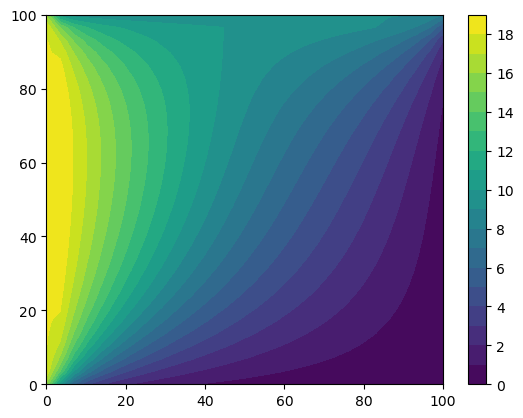

In [20]:
"""
Plot solution found
"""
# Maillage de la plaque
x = np.zeros((Nx, Ny))
y = np.zeros((Nx, Ny))
for i in range(Nx):
    for j in range(Ny):
        x[i, j] = i*Dx
        y[i, j] = j*Dy
        
# from vect to 2D
U_final = vect_Unew.reshape(-1, N).T

plt.contourf(x, y, U_final, 20)
plt.colorbar()
plt.show()

<div style="background-color: #f8f8f8; padding: 1em;">
<b>Description</b><br>
The blue areas are cold, and the yellow area is hot. Logically, we observe that the heat from the left side of the plate propagates inwards, and that from the top propagates downwards proportionally to the heating intensity, 20 degrees on the left and 10 degrees at the top. This explains the difference in color in the contour lines.
</div>

<h3>Exercise 5 (Modeling option)</h3>

Consider the biharmonic equation
$$
\Delta^2 u(s, t):=\Delta(\Delta u(s, t))=f(s, t) \quad(s, t) \in \Omega,
$$
with
$$
u(s, t)=0, \quad \Delta u(s, t)=0 \quad(s, t) \in \partial \Omega .
$$

Here $\Omega$ is the open unit square. The condition $\Delta u=0$ is called the Navier boundary condition. Moreover,
$$
\Delta^2 u=u_{x x x x}+2 u_{x x y y}+u_{y y y y} .
$$
- a) Let $v=-\Delta u$. Show that 3 can be written as a system
$$
\begin{aligned}
-\Delta v(s, t) & =f(s, t) \quad(s, t) \in \Omega \\
-\Delta u(s, t) & =v(s, t) \quad(s, t) \in \Omega \\
u(s, t) & =v(s, t)=0 \quad(s, t) \in \partial \Omega .
\end{aligned}
$$

<hr>
Let $v=-\Delta u$
$$
\begin{aligned}
v=-\Delta u & \Leftrightarrow-v(s, t) = \Delta u(s, t) \\
& \Leftrightarrow-\Delta v(s, t)= \Delta(\Delta u(s, t)) \\
& \Leftrightarrow-\Delta v(s, t)=f(s ; t) \text { as } \Delta(\Delta u(s, t))=f(s, t)
\end{aligned}
$$
<br>
$$
\text { so }(3) \Leftrightarrow\left\{\begin{array}{l}
-\Delta v(s, t)=J(s, t) \quad(s, t) \in \Omega \\
-\Delta v(s, t)=v(s, t)(s, t) \in \Omega \\
M(s, t)=v(s, t)=0 \quad(s, t) \in \partial \Omega
\end{array}\right.
$$

- b) Discretizing with $T=\operatorname{tridiag}(-1,2,-1) \in \mathbb{R}^{m \times m}, h=\frac{1}{m+1}$, and $F=(f(j h, k h))_{j, k=1}^m$ we get two matrix equations
$$
T V+V T=h^2 F, \quad T U+U T=h^2 V .
$$

- c) Let solve this system

In [21]:
import numpy as np

"""
Utils
"""
def tridiag(a, b, c):
    return np.diag(a, k=1) + np.diag(b, k=0) + np.diag(c, k=-1)

def computeA(N):
    a = -1*np.ones(N-1)
    d = 2*np.ones(N)
    T = tridiag(a, d, a)
    I = np.identity(N)
    A = np.kron(T, I) + np.kron(I, T)
    return A

"""
Problem data
"""
L = 1 #L=b-a
N = 20
h = L/(N-1)
s = np.linspace(0, L, N+2)
t = np.linspace(0, L, N+2)
f = lambda x,y: np.sin(x**2 - y**2)*np.exp(-x**2 - y**2)

A = computeA(N)
F = np.zeros((N, N))
for i in range(1, N+1):
    for j in range(1, N+1):
        F[i-1,j-1] = f(s[i], t[j])

# Compute V
h2F = (h**2)*F.T.flatten()
V = np.linalg.solve(A, h2F)

# Compute U
h2V = (h**2) * V
U = np.linalg.solve(A, h2V)
U_final = np.zeros((N+2, N+2))
U_final[1:N+1, 1:N+1] = U.reshape(-1, N).T

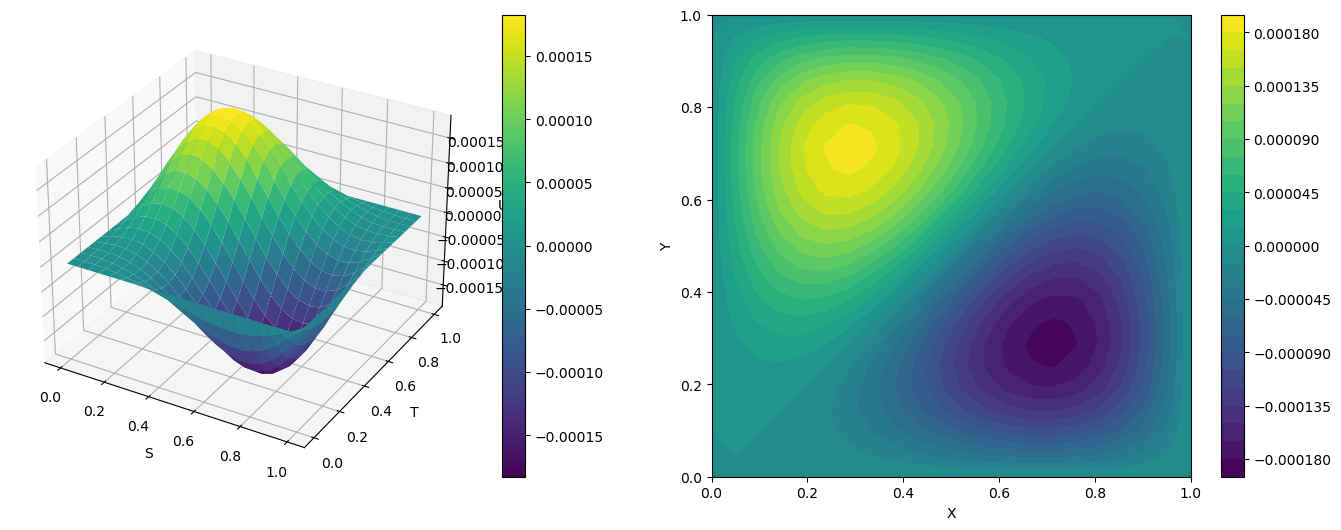

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Plot
fig = plt.figure(figsize=(17, 6))
s_p, t_p = np.meshgrid(s, t)

# Subplot for 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(s_p, t_p, U_final, cmap='viridis')
fig.colorbar(surf, ax=ax1)
ax1.set_xlabel('S')
ax1.set_ylabel('T')
ax1.set_zlabel('U')

# Subplot for contour
ax2 = fig.add_subplot(122)
contour = ax2.contourf(s, t, U_final, 30)
fig.colorbar(contour, ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.show()

<div style="text-align: center; background-color: #f8f8f8; padding: 2em;">
    <h5>QFM-ABS 2023-2024</h5>
    <h4>UM6P</h4>
</div>